<a href="https://colab.research.google.com/github/Swapnil-M1D62Y402/Pytorch-Basics-/blob/main/01_Pytorch_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import the libs
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [15]:
bias = 0.9
weight = 0.3

X = torch.arange(start=0, end=1, step=0.01).unsqueeze(dim=1)  #unsqueeze(dim=1) adds another dimension
y = X*weight + bias


In [16]:
split_ratio = int (0.8*len(X))

X_train, y_train = X[:split_ratio], y[:split_ratio]
X_test  , y_test = X[split_ratio:], y[split_ratio:]

In [17]:
def plot_predictions(X_train = X_train,
                     y_train = y_train,
                     X_test = X_test,
                     y_test = y_test,
                     prediction = None):
  plt.scatter(X_train, y_train, s=0.25, c="y", label="Training Data")
  plt.scatter(X_test, y_test, s=0.25, c="r", label = "Test Data")

  if prediction is not None:
    plt.scatter(X_test, prediction, c="b", s=0.125 ,label="Prediction")

    #Legend
  plt.legend(prop={"size": 10});

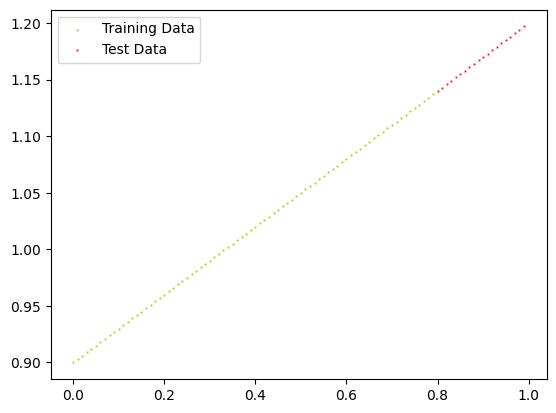

In [18]:
plot_predictions(X_train, y_train, X_test, y_test)

In [19]:
#Create the Regression class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    self.weight = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) ->torch.Tensor:
      return self.weight * x + self.bias

torch.manual_seed(1)
model_1 = LinearRegressionModel()

#set model to target device
model_1.to(device)
next(model_1.parameters()).device #check the device on which model is running

device(type='cpu')

In [20]:
#create the loss function and the optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.01)

In [21]:
epochs = 300

epoch_count = []
loss_value = []
test_loss_value = []

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  #training
  model_1.train()

  #forward-prop
  y_preds = model_1(X_train)
  #loss calulate
  loss = loss_fn(y_preds, y_train)
  #zero grad of optimizer
  optimizer.zero_grad()
  #backprop
  loss.backward()
  #step up by optimizer
  optimizer.step()

  if epoch%20 == 0:

  #Testing
    model_1.eval()

    with torch.inference_mode():
      test_pred = model_1(X_test)

      #calculate test loss
      test_loss = loss_fn(test_pred, y_test)

      #print out the data
      print(f"Epoch : {epoch}, Train loss : {loss}, Test loss : {test_loss}")
      print(model_1.state_dict())

  if epoch%5 == 0:
    epoch_count.append(epoch)
    loss_value.append(loss)
    test_loss_value.append(test_loss)



Epoch : 0, Train loss : 0.2517127990722656, Test loss : 0.2547155022621155
OrderedDict([('bias', tensor([0.6714])), ('weight', tensor([0.2709]))])
Epoch : 20, Train loss : 0.020507989451289177, Test loss : 0.015989292412996292
OrderedDict([('bias', tensor([0.8714])), ('weight', tensor([0.3499]))])
Epoch : 40, Train loss : 0.004117191769182682, Test loss : 0.00892947893589735
OrderedDict([('bias', tensor([0.8921])), ('weight', tensor([0.3188]))])
Epoch : 60, Train loss : 0.008624271489679813, Test loss : 0.0007689475896768272
OrderedDict([('bias', tensor([0.8954])), ('weight', tensor([0.3043]))])
Epoch : 80, Train loss : 0.008624271489679813, Test loss : 0.0007689475896768272
OrderedDict([('bias', tensor([0.8954])), ('weight', tensor([0.3043]))])
Epoch : 100, Train loss : 0.008624271489679813, Test loss : 0.0007689475896768272
OrderedDict([('bias', tensor([0.8954])), ('weight', tensor([0.3043]))])
Epoch : 120, Train loss : 0.008624271489679813, Test loss : 0.0007689475896768272
OrderedD

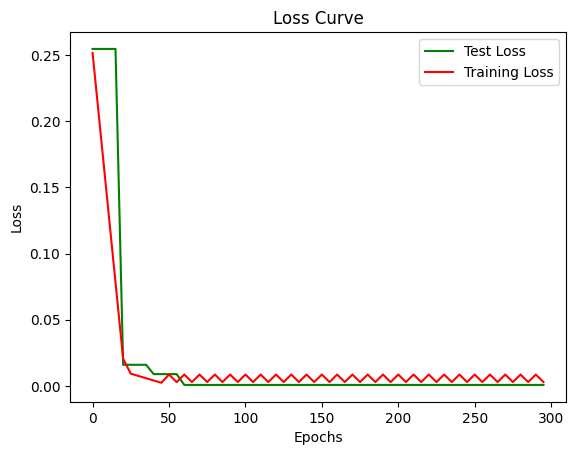

In [22]:
plt.plot(epoch_count, np.array(torch.tensor(test_loss_value).numpy()), label="Test Loss", c="g")
plt.plot(epoch_count, np.array(torch.tensor(loss_value).numpy()), label="Training Loss", c="r")
plt.title("Loss Curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(prop={"size":10})

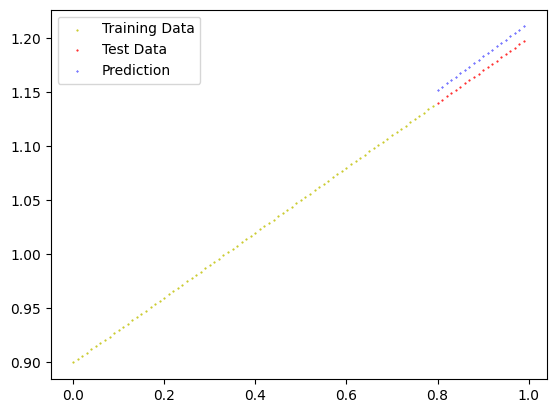

In [23]:
torch.manual_seed(1)
with torch.inference_mode():
  y_preds_new = model_1(X_test).cpu()
plot_predictions(prediction=y_preds_new)

predictions coverges for lr=0.012485

In [25]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_Pytorch_Exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model Save path : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Model Save path : models/01_Pytorch_Exercise.pth


In [26]:
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModel()

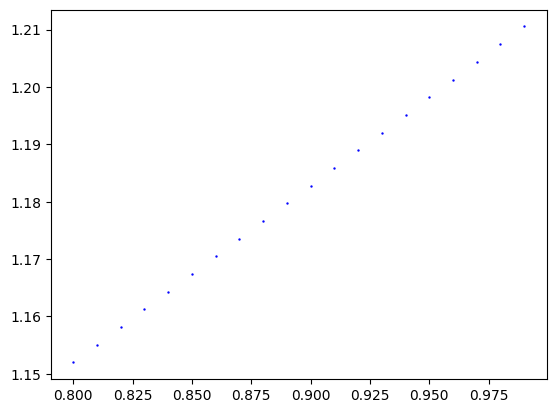

In [28]:
loaded_model_1.eval()

with torch.inference_mode():
  loaded_y_preds = loaded_model_1(X_test)

plt.scatter(X_test, loaded_y_preds, s=0.5, c="b", label="Loaded Data")